In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
import colorcet as cc
from scipy import stats
from matplotlib import colors
from astropy.visualization.hist import hist as fancyhist
from astroML.stats import sigmaG
import random

## Load Data

In [2]:
path = '/Users/sofimar/Desktop/Black Holes/'

In [3]:
# array of redshift values
xray_z = np.loadtxt(path+'xrayz.txt')

# eROSITA masses and redshifts
meR = np.loadtxt(path+'meR.txt')
zeR = np.loadtxt(path+'zeR.txt')

# Array of eROSITA masses at z=1
mz1 = meR[zeR==xray_z[20]]

# Arrays for LISA SNR curves for q=1
q1snr8 = np.loadtxt(path+'q1_snr8.txt')
q1snr64 = np.loadtxt(path+'q1_snr64.txt')
q1snr256 = np.loadtxt(path+'q1_snr256.txt')
q1snr1024 = np.loadtxt(path+'q1_snr1024.txt')
q1snr4096 = np.loadtxt(path+'q1_snr4096.txt')

# Arrays for LISA SNR curves for q=0.1
q01snr8 = np.loadtxt(path+'q01_snr8.txt')
q01snr64 = np.loadtxt(path+'q01_snr64.txt')
q01snr256 = np.loadtxt(path+'q01_snr256.txt')
q01snr1024 = np.loadtxt(path+'q01_snr1024.txt')
q01snr4096 = np.loadtxt(path+'q01_snr4096.txt')

## Data Visualization

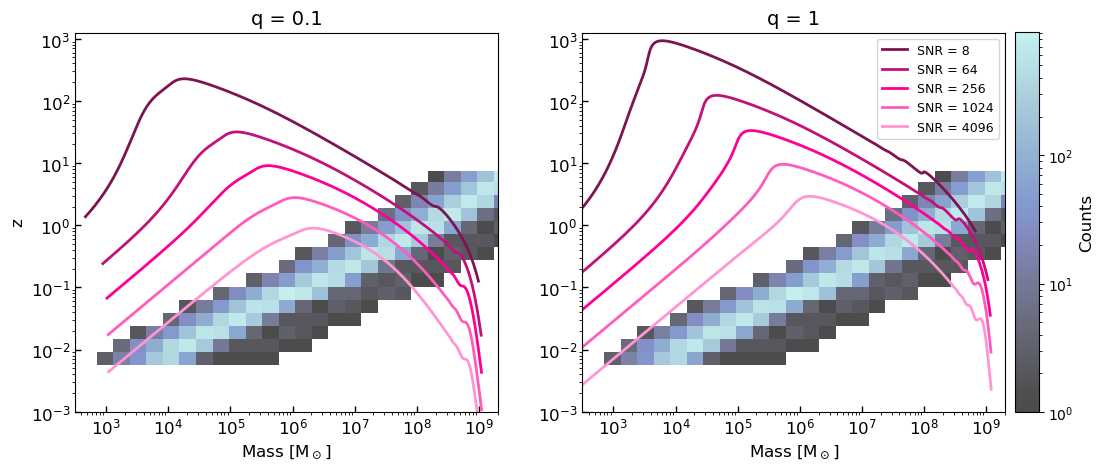

In [6]:
colors_ = ['#7D1452', '#C11279', '#FF0095', '#FF5CBC', '#FF96D4']

x_bin = 10**np.linspace(np.log10(np.min(meR))-10,np.log10(np.max(meR)),70)
y_bin = 10**np.linspace(np.log10(np.max(zeR))-4, np.log10(np.max(zeR)), 20)

hist, xedge, yedge = np.histogram2d(meR, zeR, bins=[x_bin,y_bin], density=False)


fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(1,2,1)
p1.set_aspect('equal')
plt.tick_params('x', length=4, width=1, direction= 'in')
plt.tick_params('y', length=4, width=1, direction='in')
plt.xscale('log')
plt.yscale('log')
plt.pcolormesh(xedge[:-1],yedge[:-1], hist.transpose(), norm=colors.LogNorm(), cmap=cmr.sapphire, alpha=0.7)
plt.loglog(q01snr8[0], q01snr8[1], color=colors_[0], linewidth=2)
plt.loglog(q01snr64[0], q01snr64[1], color=colors_[1], linewidth=2)
plt.loglog(q01snr256[0], q01snr256[1], color=colors_[2], linewidth=2)
plt.loglog(q01snr1024[0], q01snr1024[1], color=colors_[3], linewidth=2)
plt.loglog(q01snr4096[0], q01snr4096[1], color=colors_[4], linewidth=2)
plt.xlim(10**2.5, 2e+9)
plt.ylim(10**-3, 10**3.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('q = 0.1', fontsize=14)
plt.xlabel('Mass [M$_\odot$]', fontsize=12)
plt.ylabel('z', fontsize=12)

p2 = fig.add_subplot(1,2,2)
p2.set_aspect('equal')
plt.tick_params('x', length=4, width=1, direction= 'in')
plt.tick_params('y', length=4, width=1, direction='in')
plt.xscale('log')
plt.yscale('log')
plt.pcolormesh(xedge[:-1],yedge[:-1], hist.transpose(), norm=colors.LogNorm(), cmap=cmr.sapphire, alpha=0.7)
plt.loglog(q1snr8[0], q1snr8[1], color=colors_[0], label='SNR = 8', linewidth=2)
plt.loglog(q1snr64[0], q1snr64[1], color=colors_[1], label='SNR = 64', linewidth=2)
plt.loglog(q1snr256[0], q1snr256[1], color=colors_[2], label='SNR = 256', linewidth=2)
plt.loglog(q1snr1024[0], q1snr1024[1], color=colors_[3], label='SNR = 1024', linewidth=2)
plt.loglog(q1snr4096[0], q1snr4096[1], color=colors_[4], label='SNR = 4096', linewidth=2)
plt.xlim(10**2.5, 2e+9)
plt.ylim(10**-3, 10**3.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mass [M$_\odot$]', fontsize=12)
plt.title('q = 1', fontsize=14)
plt.legend(fontsize=9)

cax = plt.axes((0.908, 0.115, 0.02, 0.76))
cb = plt.colorbar(cax=cax)
cb.set_label('Counts', fontsize=12)

plt.savefig('Final/datavis.png', dpi=500, bbox_inches='tight')


## Mass distribution of eROSITA sources at z = 1

In [5]:
logm = np.log10(mz1)

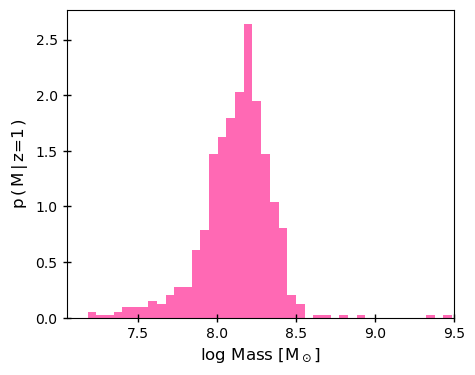

In [7]:
plt.figure(figsize=(5,4))

fancyhist(logm, bins='freedman', density=True, color='hotpink', align='mid')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
plt.savefig('Final/simplehist.jpg', dpi=500, bbox_inches='tight')

### LISA SNR curves discrete values at z = 0.1 for q=0.1 and q=1 overplotted on top of the mass distribution of eROSITA sources at z = 1

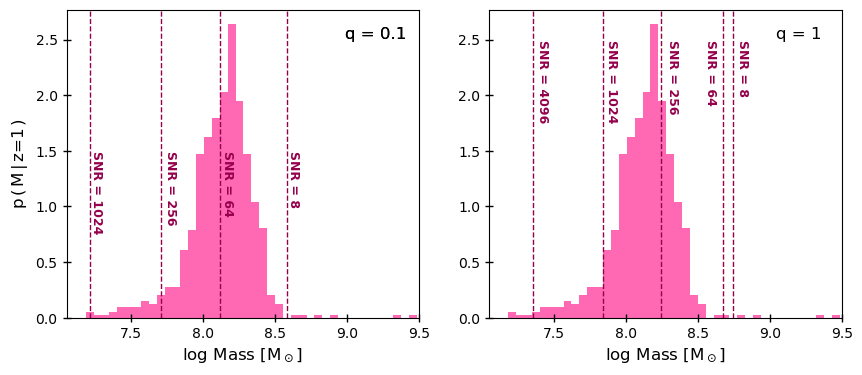

In [9]:
fig = plt.figure(figsize=(10,4))

fig.add_subplot(1,2,1)
fancyhist(logm, bins='freedman', density=True, color='hotpink', align='mid')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
plt.text(9.2,2.55, 'q = 0.1', fontsize=12, 
         verticalalignment='center', color='black',
         horizontalalignment='center')
plt.axvline(np.log10(q01snr8[0][487]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q01snr64[0][447]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q01snr256[0][413]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q01snr1024[0][372]), ls='--', color='#94004B', linewidth=1)
plt.text(9.2,2.55, 'q = 0.1', fontsize=12, 
         verticalalignment='center', color='black',
         horizontalalignment='center')

plt.text(8.63, 1.5, 'SNR = 8', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(8.17, 1.5, 'SNR = 64', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(7.77, 1.5, 'SNR = 256', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(7.26, 1.5, 'SNR = 1024', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')


fig.add_subplot(1,2,2)
fancyhist(logm, bins='freedman', density=True, color='hotpink', align='mid')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
# plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
plt.text(9.2,2.55, 'q = 1', fontsize=12, 
         verticalalignment='center', color='black',
         horizontalalignment='center')
plt.axvline(np.log10(q1snr8[0][498]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q1snr64[0][492]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q1snr256[0][465]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q1snr1024[0][439]), ls='--', color='#94004B', linewidth=1)
plt.axvline(np.log10(q1snr4096[0][408]), ls='--', color='#94004B', linewidth=1)
plt.text(8.81, 2.5, 'SNR = 8', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(8.59, 2.5, 'SNR = 64', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(8.32, 2.5, 'SNR = 256', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(7.9, 2.5, 'SNR = 1024', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')

plt.text(7.42, 2.5, 'SNR = 4096', color='#94004B', fontsize=9, rotation=270,
         verticalalignment='top', horizontalalignment='center', weight='bold')


plt.savefig('Final/z1_snr_hist.jpg', dpi=500, bbox_inches='tight')

# Is the distribution Gaussian though?

**I will create a pdf based on the data mean and standard deviation**

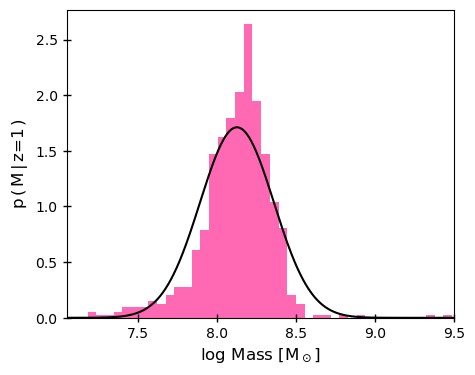

In [10]:
mu = np.mean(logm)
sig = np.std(logm)
xx = np.linspace(7,10, 1000)

pdf1 = stats.norm.pdf(xx, loc=mu, scale=sig)

plt.figure(figsize=(5,4))
fancyhist(logm, bins='freedman', density=True, color='hotpink', align='mid')
plt.plot(xx, pdf1, color='black')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)

plt.savefig('Final/og_gauss.jpg', dpi=500, bbox_inches='tight')

### Ehhh... it's not great. Luckily, according to Sofian statistics, everything is a Gaussian if you try hard enough!

**Bootstrap sampling of the mean, sample standard deviation, and $\sigma _G$**

In [11]:
x_boot = np.empty(shape=(10000,500))
boot_mu = np.empty(10000)
sig_boot = np.empty(10000)
sigG_boot = np.empty(10000)

for i in range(10000):
    for j in range(500):
        x_boot[i,j] = random.choice(logm)


for i in range(10000):
    boot_mu[i] = np.mean(x_boot[i])
    sig_boot[i] = np.std(x_boot[i])
    sigG_boot[i] = sigmaG(x_boot[i])

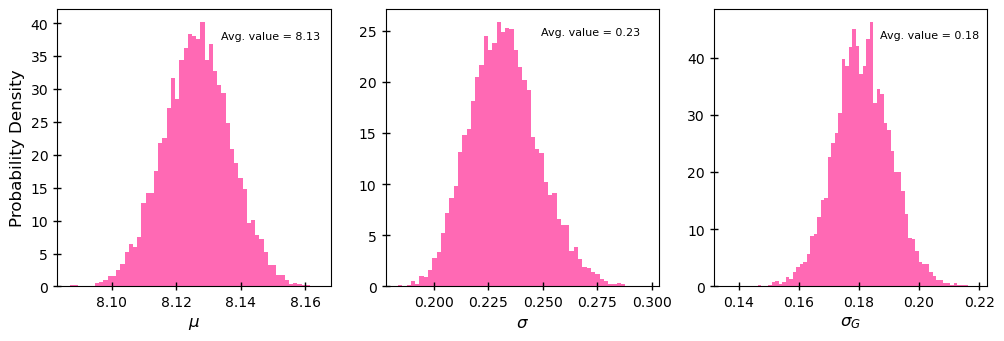

In [15]:
avg_mu = np.mean(boot_mu)
avg_sig = np.mean(sig_boot)
avg_sigG = np.mean(sigG_boot)

fig = plt.figure(figsize=(12,3.6))

fig.add_subplot(1,3,1)
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('$\mu$', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
fancyhist(boot_mu, density=True, bins='freedman', color='hotpink');
plt.text(8.134, 38, 'Avg. value = '+str(f'{avg_mu:.2f}'), fontsize=8, verticalalignment='center',
         horizontalalignment='left')

fig.add_subplot(1,3,2)
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('$\sigma$', fontsize=12)
fancyhist(sig_boot, density=True, bins='freedman', color='hotpink');
plt.text(0.249, 24.9, 'Avg. value = '+str(f'{avg_sig:.2f}'), fontsize=8, verticalalignment='center',
         horizontalalignment='left')

fig.add_subplot(1,3,3)
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('$\sigma _G$', fontsize=12)
fancyhist(sigG_boot, density=True, bins='freedman', color='hotpink');
plt.text(0.187, 44, 'Avg. value = '+str(f'{avg_sigG:.2f}'), fontsize=8, verticalalignment='center',
         horizontalalignment='left')

plt.savefig('Final/bootstrap3.jpg', dpi=500, bbox_inches='tight')

### PDF with $\mu = 8.13$ and standard deviation of <$\sigma$> or <$\sigma _G$>

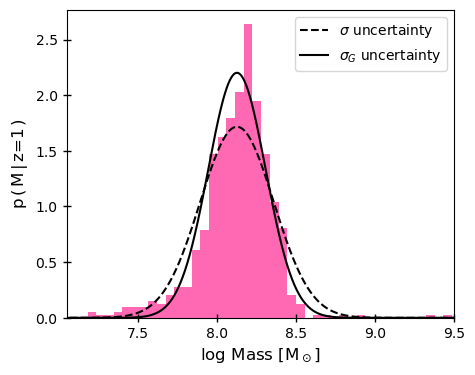

In [16]:
pdf_sig = stats.norm.pdf(xx, loc=avg_mu, scale=avg_sig)
pdf_sigG = stats.norm.pdf(xx, loc=avg_mu, scale=avg_sigG)

plt.figure(figsize=(5,4))
fancyhist(logm, bins='freedman', density=True, color='hotpink', align='mid')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
plt.plot(xx, pdf_sig, color='black', ls='--', label='$\sigma$ uncertainty')
plt.plot(xx, pdf_sigG, color='black', label='$\sigma _G$ uncertainty')
plt.legend(fontsize=10)

plt.savefig('Final/compare_dist.jpg', dpi=500, bbox_inches='tight')

### PDF with $\sigma _G$ uncertainty looks more like the distribution

## Sampling data using Monte Carlo

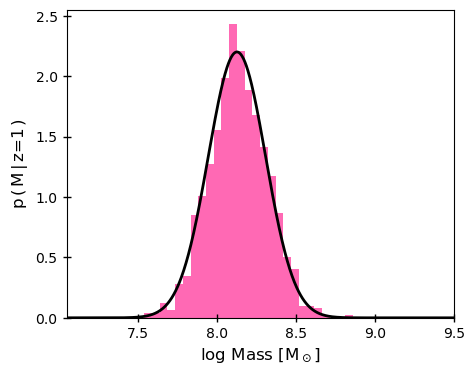

In [121]:
# Manually making mass histogram instead of using fancyhist()
db = 2.7*sigmaG(logm)/((len(logm))**(1/3))
bins = np.arange(np.min(logm), np.max(logm)+db, db)
counts, bins = np.histogram(logm, density=True, bins=bins)

max_val = counts.max()

N = 7000 # trials
q = np.random.uniform(np.min(logm), np.max(logm), N) # proposed points
u = np.random.uniform(0, max_val, N) # uniform draws

gauss = stats.norm(loc=avg_mu, scale=avg_sigG)
mask = u<=gauss.pdf(q)

monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.figure(figsize=(5,4))
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
fancyhist(monte_carlo, density=True, bins='freedman', color='hotpink')
plt.plot(xx,pdf_sigG, color='black', linewidth=2)

plt.savefig('Final/mc_hist_pdf.jpg', dpi=500, bbox_inches='tight')

**Oh that's beautiful**

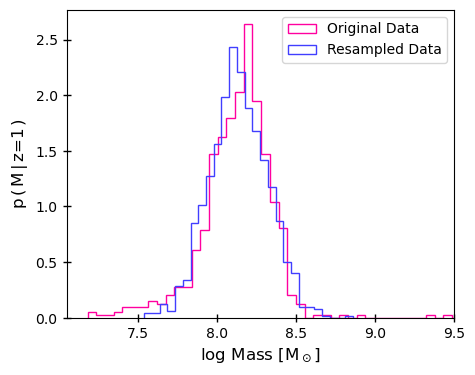

In [141]:
plt.figure(figsize=(5,4))

fancyhist(logm, bins='freedman', density=True, color='#FF009F', align='mid', histtype='step',
          label='Original Data')
fancyhist(monte_carlo, bins='freedman', density=True, color='#413EFF', align='mid', histtype='step',
          label='Resampled Data')
# fancyhist(rvs_sample, bins='freedman', density=True, color='orange', align='mid', histtype='step',
#           label='Sampled from PDF')
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.05,9.5)
plt.legend(fontsize=10)

plt.savefig('Final/og_vs_new.jpg', dpi=500, bbox_inches='tight')

In [142]:
stats.ks_2samp(monte_carlo, logm)

KstestResult(statistic=0.055928596289219146, pvalue=0.13754369422125526, statistic_location=8.139643829133204, statistic_sign=1)

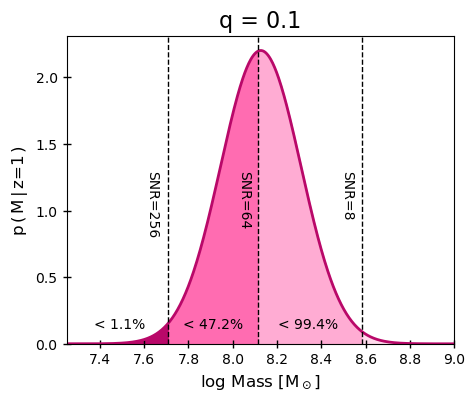

In [49]:
# Percent of data at each SNR threshold
cdf8 = gauss.cdf(np.log10(q01snr8[0][487]))*100
cdf64 = gauss.cdf(np.log10(q01snr64[0][447]))*100
cdf256 = gauss.cdf(np.log10(q01snr256[0][413]))*100

plt.figure(figsize=(5,4))
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.25,9)
plt.plot(xx,pdf_sigG, color='#B90869', linewidth=2)


# plt.fill_between(xx[xx>=np.log10(q01snr8[0][487])],pdf_sigG[xx>=np.log10(q01snr8[0][487])], 
#                  color='#B90869')
# plt.fill_between(xx[xx<=np.log10(q01snr8[0][487])],pdf_sigG[xx<=np.log10(q01snr8[0][487])], 
#                  color='#FF6CB1')
# plt.fill_between(xx[xx<=np.log10(q01snr64[0][447])],pdf_sigG[xx<=np.log10(q01snr64[0][447])], 
#                  color='#FFACD3')
# plt.fill_between(xx[xx<=np.log10(q01snr256[0][413])],pdf_sigG[xx<=np.log10(q01snr256[0][413])], 
#                  color='#FFDBEC')

plt.fill_between(xx[xx>=np.log10(q01snr8[0][487])],pdf_sigG[xx>=np.log10(q01snr8[0][487])], 
                 color='#FFDBEC')
plt.fill_between(xx[xx<=np.log10(q01snr8[0][487])],pdf_sigG[xx<=np.log10(q01snr8[0][487])], 
                 color='#FFACD3')
plt.fill_between(xx[xx<=np.log10(q01snr64[0][447])],pdf_sigG[xx<=np.log10(q01snr64[0][447])], 
                 color='#FF6CB1')
plt.fill_between(xx[xx<=np.log10(q01snr256[0][413])],pdf_sigG[xx<=np.log10(q01snr256[0][413])], 
                 color='#B90869')
plt.ylim(0)
plt.title('q = 0.1', fontsize=16)
plt.axvline(np.log10(q01snr8[0][487]), ls='--', color='k', linewidth=1)
plt.axvline(np.log10(q01snr64[0][447]), ls='--', color='k', linewidth=1)
plt.axvline(np.log10(q01snr256[0][413]), ls='--', color='k', linewidth=1)
# plt.axvline(np.log10(q01snr1024[0][372]), ls='--', color='#94004B', linewidth=1)
# plt.text(9.2,2.55, 'q = 0.1', fontsize=12, 
#          verticalalignment='center', color='black',
#          horizontalalignment='center')

plt.text(8.516, 1.3, 'SNR=8', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(8.05, 1.3, 'SNR=64', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(7.635, 1.3, 'SNR=256', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(8.34, 0.2, '< '+str(f'{cdf8:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')
# plt.text(8.34, 0.2, 'SNR<64', fontsize=9, verticalalignment='top', horizontalalignment='center')
plt.text(7.91, 0.2, '< '+str(f'{cdf64:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')
plt.text(7.49, 0.2, '< '+str(f'{cdf256:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')

plt.savefig('Final/filled_pdf_q01.jpg', dpi=500, bbox_inches='tight')

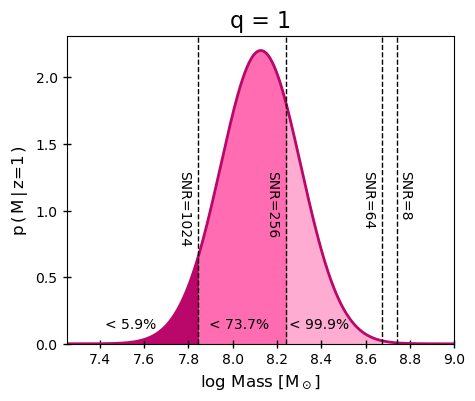

In [50]:
# Percent of data at each SNR threshold
cdf8 = gauss.cdf(np.log10(q1snr8[0][498]))*100
cdf64 = gauss.cdf(np.log10(q1snr64[0][492]))*100
cdf256 = gauss.cdf(np.log10(q1snr256[0][465]))*100
cdf1024 = gauss.cdf(np.log10(q1snr1024[0][439]))*100

plt.figure(figsize=(5,4))
plt.tick_params('x', length=6, width=1, direction= 'inout')
plt.tick_params('y', length=6, width=1, direction='inout')
plt.xlabel('log Mass [M$_\odot$]', fontsize=12)
plt.ylabel('p$\,$($\,$M$\,$|$\,$z=1$\,$)', fontsize=12)
plt.xlim(7.25,9)
plt.plot(xx,pdf_sigG, color='#B90869', linewidth=2)


plt.fill_between(xx[xx>=np.log10(q1snr8[0][498])],pdf_sigG[xx>=np.log10(q1snr8[0][498])], 
                 color='#FFDBEC')
plt.fill_between(xx[xx<=np.log10(q1snr8[0][498])],pdf_sigG[xx<=np.log10(q1snr8[0][498])], 
                 color='#FFDBEC')
plt.fill_between(xx[xx<=np.log10(q1snr64[0][492])],pdf_sigG[xx<=np.log10(q1snr64[0][492])], 
                 color='#FFACD3')
plt.fill_between(xx[xx<=np.log10(q1snr256[0][465])],pdf_sigG[xx<=np.log10(q1snr256[0][465])], 
                 color='#FF6CB1')
plt.fill_between(xx[xx<=np.log10(q1snr1024[0][439])],pdf_sigG[xx<=np.log10(q1snr1024[0][439])], 
                 color='#B90869')
plt.ylim(0)
plt.title('q = 1', fontsize=16)
plt.axvline(np.log10(q1snr8[0][498]), ls='--', color='k', linewidth=1)
plt.axvline(np.log10(q1snr64[0][492]), ls='--', color='k', linewidth=1)
plt.axvline(np.log10(q1snr256[0][465]), ls='--', color='k', linewidth=1)
plt.axvline(np.log10(q1snr1024[0][439]), ls='--', color='k', linewidth=1)
# plt.axvline(np.log10(q01snr1024[0][372]), ls='--', color='#94004B', linewidth=1)
# plt.text(9.2,2.55, 'q = 0.1', fontsize=12, 
#          verticalalignment='center', color='black',
#          horizontalalignment='center')

plt.text(8.78, 1.3, 'SNR=8', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(8.612, 1.3, 'SNR=64', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(8.176, 1.3, 'SNR=256', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')

plt.text(7.78, 1.3, 'SNR=1024', color='k', fontsize=10, rotation=270,
         verticalalignment='top', horizontalalignment='center')


plt.text(8.39, 0.2, '< '+str(f'{cdf64:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')
plt.text(8.03, 0.2, '< '+str(f'{cdf256:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')
plt.text(7.54, 0.2, '< '+str(f'{cdf1024:.1f}')+'%', fontsize=10, 
         verticalalignment='top', horizontalalignment='center')

plt.savefig('Final/filled_pdf_q1.jpg', dpi=500, bbox_inches='tight')